# Reflexión

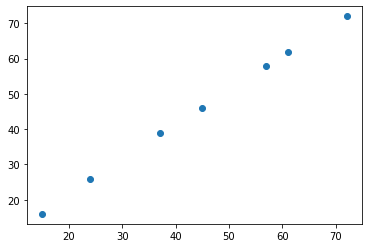

In [136]:
import numpy as np
import matplotlib.pyplot as plt
theta_i=np.array([15.0,24.0,37.0,45.0,57.0,61.0,72.0])
theta_r=np.array([16.0,26.0,39.0,46.0,58.0,62.0,72.0])

plt.scatter(theta_i,theta_r)

In [137]:
#ibreria para el ajuste
from scipy.optimize import curve_fit
#Defino la funcion a ajustar
def func(x,a,b):
    return a*x + b
#Con la funcion curve_fit obtengo 
#popt: coeficientes
popt, pcov = curve_fit(func, theta_i, theta_r,p0=(1,0))
popt

array([0.97810631, 2.11556258])

In [138]:
#pcov: covarianza
pcov

array([[ 1.29841455e-04, -5.76867042e-03],
       [-5.76867042e-03,  3.03253983e-01]])

In [139]:
#perr: Errores de coeficientes
perr = np.sqrt(np.diag(pcov))
perr

array([0.0113948 , 0.55068501])

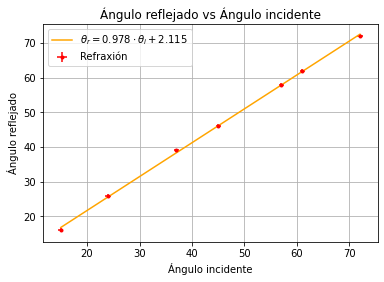

In [140]:
x = np.linspace(np.min(theta_i),np.max(theta_i),1000)
y = popt[0]*x + popt[1]


plt.errorbar(theta_i,theta_r,color="red",xerr=0.5,yerr=0.5,fmt=".",label="Refraxión")
plt.plot(x,y,color="orange",label=r"$\theta_r=0.978\cdot\theta_i + 2.115$")
plt.legend()
plt.title("Ángulo reflejado vs Ángulo incidente")
plt.ylabel("Ángulo reflejado")
plt.xlabel("Ángulo incidente")
plt.grid()

plt.savefig("Ajuste-reflexion",dpi=100)

# Refracción

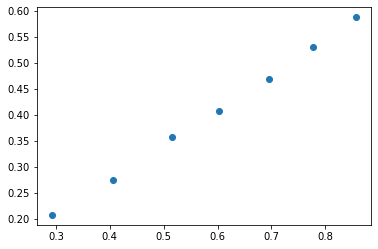

In [141]:
import numpy as np
import matplotlib.pyplot as plt
theta_i = np.array([17.0,24.0,31.0,37.0,44.0,51.0,59.0])
theta_t = np.array([12.0,16.0,21.0,24.0,28.0,32.0,36.0])
sen_theta_i = np.sin(theta_i*np.pi/180) 
sen_theta_t = np.sin(theta_t*np.pi/180)
plt.scatter(sen_theta_i,sen_theta_t)

In [142]:
from scipy.optimize import curve_fit
#Defino la funcion a ajustar
def func(x,a,b):
    return a*x + b
#Con la funcion curve_fit obtengo 
#popt: coeficientes
popt, pcov = curve_fit(func, sen_theta_t, sen_theta_i,p0=(1.5,0))
popt

array([ 1.48601804, -0.00988015])

In [143]:
#perr: Errores de coeficientes
perr = np.sqrt(np.diag(pcov))
perr

array([0.02302868, 0.00976937])

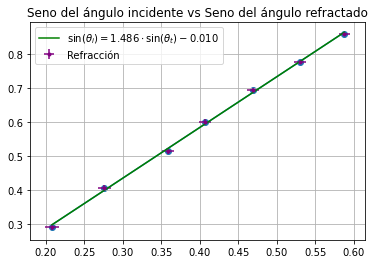

In [144]:
x = np.linspace(np.min(sen_theta_t),np.max(sen_theta_t),1000)
y = popt[0]*x + popt[1]

x_error=np.abs(np.cos(theta_t*np.pi/180)*0.5*np.pi/180)
y_error=np.abs(np.cos(theta_i*np.pi/180)*0.5*np.pi/180)

plt.plot(x,y)
plt.scatter(sen_theta_t,sen_theta_i)



plt.errorbar(sen_theta_t,sen_theta_i,color="purple",xerr=x_error,yerr=y_error,fmt=".",label="Refracción")
plt.plot(x,y,color="green",label=r"$\sin(\theta_i)= 1.486\cdot\sin(\theta_t) - 0.010$")
plt.title("Seno del ángulo incidente vs Seno del ángulo refractado")

plt.legend()
plt.grid()
plt.savefig("Ajuste-refraccion",dpi=100)

Fuente https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html